In [ ]:
#hide
from medtop.core import *
from medtop.helpers import *
from medtop.nlp_helpers import *
from medtop.preprocessing import *
from nbdev.showdoc import *
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#hide
# wide screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# MedTop

> Extracting topics from reflective medical writings

This file will become your README and also the index of your documentation.

## Install

`pip install medtop`

## How to use

Download NLTK data to your machine using `python -m nltk.downloader all`

Import documents from a text file containing a list of all documents  
**QUESTION: I can't see anywhere we are actually using `my_docs_pos` or `my_docs_loc`. Can we remove these?**

In [ ]:
# #TODO: some documents aren't loading properly
# path_to_file_list = 'data/2019.03.11_DevCorpus/file_list.txt'
# my_docs, my_docs_pos, my_docs_loc, raw_sentences, raw_docs, file_list = import_docs(path_to_file_list, verbose=False)

You can review the imported documents manually by writing the sentences to disk

In [ ]:
# outfile_name = 'output/PREFIX_DocumentSentenceList.txt'
# sentences_to_disk(raw_sentences, outfile_name)

Create the TF-IDF matrix. `path_to_corpus_file_list` can be a list of just input files (Local) or a list of all files in the corpus (Global)

In [ ]:
# path_to_seed_topics_file_list = 'data/2019.03.12_SEED_TOPICS/FILELIST.txt'
# tfidf_dense, dictionary = create_tfidf(path_to_seed_topics_file_list, path_to_corpus_file_list = path_to_file_list, verbose = False)

Get the top phrases for each document.  
**TODO: This currently re-processes each sentence unnecessarily. Clean that up.**

In [ ]:
# doc_top_phrases = get_doc_top_phrases(raw_docs, dictionary.token2id, tfidf_dense, window_size = 6, include_input_in_tfidf = False)

### Create sentence vectors
**TODO: add explanations**
- TF-IDF
- SVD
- UMAP
- Pre-trained Word2Vec embeddings
- Create Word2Vec embeddings from input corpus

In [ ]:
# doc_phrase_vecs = get_doc_word_vectors_tfidf(doc_top_phrases, dictionary, tfidf_dense)
# # doc_phrase_vecs = get_doc_word_vectors_svd(doc_top_phrases, dictionary, tfidf_dense)
# # doc_phrase_vecs = get_doc_word_vectors_umap(doc_top_phrases, dictionary, tfidf_dense, umap_neighbors = 15, dimensions = 2)
# # doc_phrase_vecs = get_doc_word_vectors_pretrained(doc_top_phrases, path_to_w2v_bin_file = "data/pubmed2018_w2v_200D.bin")
# # doc_phrase_vecs = get_doc_word_vectors_local(doc_top_phrases, raw_docs, my_docs)

Filter the sentences, removing any that contain zero "top phrases"  
**QUESTION: After filtering here, we never again use the filtered records in my_docs, could we filter in place to make this cleaner?**  
**QUESTION: Is there a reason we're storing `just_phrase_ids` as a concatenated string instead of a tuple? We can always convert to string when writing to a file, but it makes for messier logic than necessary.**

In [ ]:
# total_phrase_num = sum([len(phrase_vecs) for phrase_vecs in doc_phrase_vecs])
# just_phrase_vecs, just_phrase_ids, just_phrase_text = filter_sentences(doc_phrase_vecs, doc_top_phrases)

### Clustering
**QUESTION: Is there still a need to save charts?**

#### K-means Clustering
When using K-means clustering, you can find the optimal k value from a given range. `get_optimal_k` visualizes the silhoute coefficients for a range of k values and returns the value corresponding to the max silhoute coefficient.

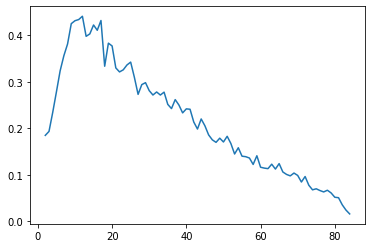

In [ ]:
# optimal_k = get_optimal_k(just_phrase_vecs, save_chart = False)
# cluster_assignments, dist = get_cluster_assignments_kmeans(optimal_k, just_phrase_vecs)

#### Hierarchical Agglomerative Clustering
When using Hierarchical Agglomerative Clustering, you can find the optimal height value from a given range. `get_optimal_height` visualizes the silhoute coefficients for a range of heights and returns the value corresponding to the max silhoute coefficient.

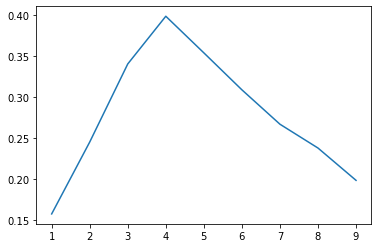

In [ ]:
# linkage_matrix = get_linkage_matrix(just_phrase_vecs, "euclidean")
# optimal_height = get_optimal_height(just_phrase_vecs, linkage_matrix, save_chart = False)
# cluster_assignments = get_cluster_assignments_hac(linkage_matrix, optimal_height)

### Visualization
All visualization uses cosine similarity. **Why?**

In [ ]:
#hide
from gensim import corpora, models, similarities
import matplotlib.pyplot as plt
from medtop.nlp_helpers import *
from medtop.preprocessing import *
import numpy as np
import pandas as pd
import plotly
import plotly.express as px
from scipy.cluster.hierarchy import ward, cut_tree
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.manifold import MDS
from sklearn.metrics import silhouette_score, pairwise_distances
from sklearn.metrics.pairwise import cosine_similarity
import os
from sklearn.decomposition import TruncatedSVD
import umap.umap_ as umap

In [ ]:
# dist = pairwise_distances(just_phrase_vecs, metric='cosine')

**QUESTION: Should visualization be three separate methods or a single method with optional parameters? There are a few other similar instances in the code where we could do multiple top-level methods or a single caller with kwargs**

In [ ]:
# visualize_umap(just_phrase_ids, cluster_assignments, just_phrase_text, dist)
# # visualize_mds(just_phrase_ids, cluster_assignments, just_phrase_text, dist)
# # visualize_svd(just_phrase_ids, cluster_assignments, just_phrase_text, dist)

**QUESTION: The variables here are named `cluster_topics`, but it seems like they're actual lists of phrases in each cluster. Need clarification**

In [ ]:
# main_cluster_topics = get_cluster_topics(cluster_assignments, just_phrase_ids, my_docs)

### Write output to files

In [ ]:
# write_output_to_disk(main_cluster_topics, just_phrase_ids, cluster_assignments, raw_sentences, doc_top_phrases, file_list, file_name = "output/TopicClusterResults.txt")
# evaluate(just_phrase_ids, cluster_assignments, just_phrase_text)

In [ ]:
#hide
from nbdev.export import notebook2script
notebook2script()

Converted Core.ipynb.
Converted helpers.ipynb.
This cell doesn't have an export destination and was ignored:
e
Converted index.ipynb.
Converted nlp_helpers.ipynb.
Converted preprocessing.ipynb.
Converted Sandbox.ipynb.
